# 🧪 Langkah-langkah Preprocessing dan Evaluasi Model pada Dataset Diabetes

---

📥 1. Load dan Pra-Pemrosesan Data

- Mengimpor dataset `diabetic_data.csv`.
- Mengganti nilai `'?'` menjadi `NaN` untuk menangani missing values secara eksplisit.

---

❌ 2. Menghapus Kolom Tidak Informatif

- Menghapus kolom dengan **lebih dari 50%** nilai yang hilang.
- Menghapus kolom yang dianggap tidak relevan atau bersifat identifier:
  - `encounter_id`, `patient_nbr`, `weight`, `payer_code`, `medical_specialty`

---

💊 3. Encoding Fitur Obat

- Semua kolom terkait penggunaan obat dikodekan ke bentuk numerik:
  - `No` → `0`
  - `Steady` → `1`
  - `Up` → `2`
  - `Down` → `3`

---

🎯 4. Encoding Target Variabel

- Kolom `readmitted` dikonversi menjadi biner:
  - `NO` → `0` (tidak readmit)
  - `<30`, `>30` → `1` (readmit)

---

🔍 5. Identifikasi Kolom Kategorikal

- Menampilkan semua kolom bertipe `object` sebelum encoding lanjutan.

---

🔁 6. One-Hot Encoding

- Mengubah semua kolom kategorikal menjadi kolom numerik menggunakan **one-hot encoding**.

---

🧼 7. Menangani Missing Values Tersisa

- Mengisi nilai hilang pada kolom numerik dengan **median** dari masing-masing kolom.

---

✅ 8. Validasi Data Akhir

- Mengecek:
  - Semua kolom bertipe numerik.
  - Tidak ada missing values yang tersisa.

---

## 🧠 Pemodelan dan Evaluasi

### 🧩 9. Pemisahan Fitur dan Target
- `X` = Semua fitur
- `y` = Target variabel `readmitted`

### 🔢 10. Konversi Tipe Fitur
- Semua fitur dikonversi ke tipe data `float`.

### ✂️ 11. Train-Test Split
- Memisahkan data ke dalam **training (80%)** dan **testing (20%)** menggunakan stratifikasi.

### 🤖 12. Inisialisasi dan Training Model
- Dua model yang digunakan:
  - 🌳 **Decision Tree** (`max_depth=5`, `min_samples_split=10`)
  - 🧠 **Naive Bayes** (`GaussianNB`)

### 📈 13. Prediksi Model
- Melakukan prediksi terhadap data test menggunakan kedua model.

### 📊 14. Evaluasi Model
- Menampilkan:
  - **Classification Report**
  - **Confusion Matrix** visual menggunakan `matplotlib`

### 🆚 15. Visualisasi Perbandingan Metrik
- Metrik yang dibandingkan:
  - Precision
  - Recall
  - F1-score
- Ditampilkan dalam bentuk **bar chart** agar mudah dibandingkan antar model.

---


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('diabetic_data.csv')

# 1. Handling missing values: ganti '?' dengan NaN
data.replace('?', np.nan, inplace=True)

# 2. Hapus kolom dengan >50% missing values
missing_threshold = len(data) * 0.5
data = data.dropna(thresh=missing_threshold, axis=1)

# 3. Hapus kolom yang tidak diperlukan
cols_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty']
for col in cols_to_drop:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

# 4. Konversi kolom obat
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
               'miglitol', 'troglitazone', 'tolazamide', 'examide',
               'citoglipton', 'insulin', 'glyburide-metformin',
               'glipizide-metformin', 'glimepiride-pioglitazone',
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in med_columns:
    if col in data.columns:
        data[col] = data[col].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})

# 5. Encode target variable
data['readmitted'] = data['readmitted'].map({'NO': 0, '<30': 1, '>30': 1})  # Binerisasi

# 6. Identifikasi dan handle kolom non-numerik
# Cek kolom yang masih non-numerik
non_numeric_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Kolom non-numerik sebelum encoding:", non_numeric_cols)

# Lakukan one-hot encoding untuk semua kolom kategorikal
if non_numeric_cols:
    data = pd.get_dummies(data, columns=non_numeric_cols)

# 7. Handle missing values terakhir
# Untuk kolom numerik: isi dengan median
# Untuk kolom kategorikal: seharusnya sudah di-handle oleh one-hot encoding
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# 8. Pastikan tidak ada missing value dan semua tipe data numerik
print("\nInfo dataset setelah preprocessing:")
print(data.info())
print("\nJumlah missing values:", data.isna().sum().sum())

# Pisahkan fitur dan target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Konversi semua fitur ke float
X = X.astype(float)

/tmp/ipython-input-32-2764492405.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
/tmp/ipython-input-32-2764492405.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
/tmp/ipython-input-32-2764492405.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
/tmp/ipython-input-32-2764492405.py:19: SettingWithCopyWarning: 
A val

Kolom non-numerik sebelum encoding: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']


/tmp/ipython-input-32-2764492405.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)



Info dataset setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2308 entries, admission_type_id to diag_3_V86
dtypes: bool(2271), float64(2), int64(35)
memory usage: 249.1 MB
None

Jumlah missing values: 0


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     10973
           1       0.63      0.49      0.55      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.65      0.10      0.17     10973
           1       0.47      0.94      0.63      9381

    accuracy                           0.48     20354
   macro avg       0.56      0.52      0.40     20354
weighted avg       0.57      0.48      0.38     20354



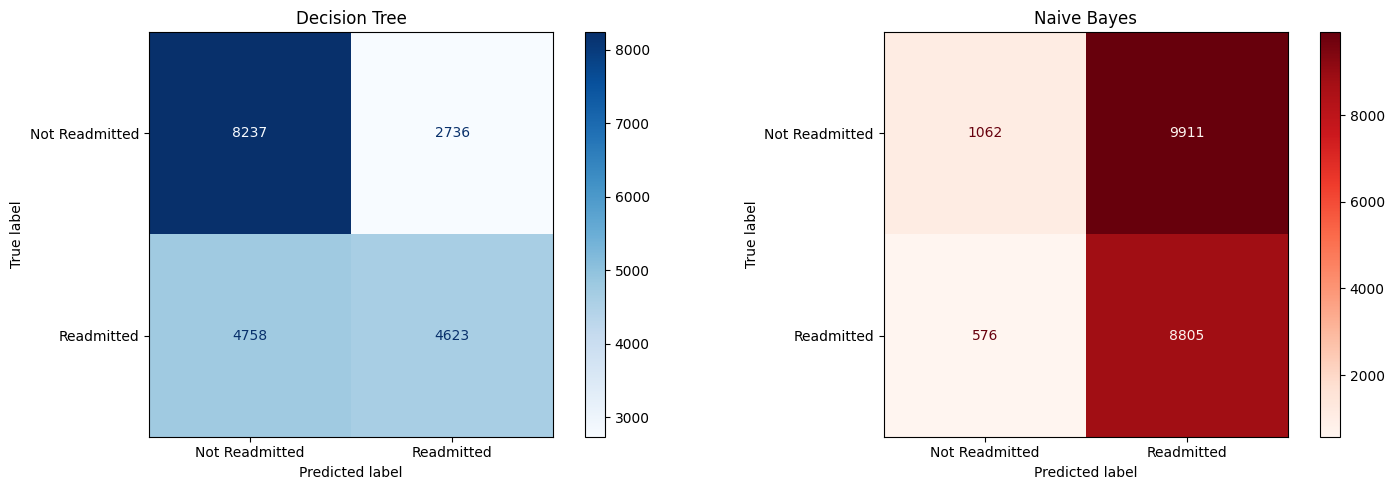

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Bagi data training-testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model dengan hyperparameter
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
nb = GaussianNB()

# Training model
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Evaluasi
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

# Visualisasi confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=ax[0], cmap='Blues', display_labels=['Not Readmitted', 'Readmitted'])
ax[0].set_title('Decision Tree')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, ax=ax[1], cmap='Reds', display_labels=['Not Readmitted', 'Readmitted'])
ax[1].set_title('Naive Bayes')
plt.tight_layout()
plt.show()

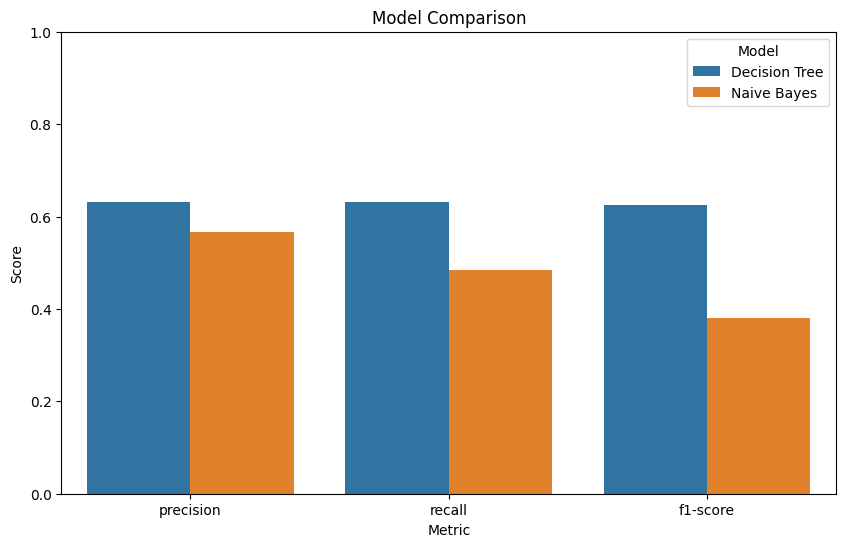

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak metrik
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
models = ['Decision Tree', 'Naive Bayes']

# Buat dataframe hasil
results = pd.DataFrame({
    'Model': models * len(metrics),
    'Metric': np.repeat(metrics, len(models)),
    'Score': [
        dt_report['weighted avg']['precision'],
        nb_report['weighted avg']['precision'],
        dt_report['weighted avg']['recall'],
        nb_report['weighted avg']['recall'],
        dt_report['weighted avg']['f1-score'],
        nb_report['weighted avg']['f1-score']
    ]
})

# Plot perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results)
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()

## 📊 Perbandingan Kinerja Model: Decision Tree vs Naive Bayes

Visualisasi di atas menunjukkan perbandingan metrik evaluasi **Precision**, **Recall**, dan **F1-Score** antara dua model klasifikasi:

- 🌳 **Decision Tree**
- 🧠 **Naive Bayes**

### 🔍 Ringkasan Hasil

| Metrik     | Decision Tree | Naive Bayes | Model Unggul |
|------------|----------------|--------------|----------------|
| Precision  | ✅ Lebih tinggi |              | Decision Tree |
| Recall     | ✅ Lebih tinggi |              | Decision Tree |
| F1-Score   | ✅ Lebih tinggi |              | Decision Tree |

### 🧾 Kesimpulan

- **Decision Tree** secara konsisten memiliki skor yang lebih tinggi di ketiga metrik utama.
- Ini menunjukkan bahwa Decision Tree lebih andal dalam mengklasifikasikan data dengan **akurasi yang seimbang** antara Precision dan Recall.
- **Naive Bayes** mungkin lebih sederhana dan cepat, tetapi dalam konteks dataset ini, performanya **tidak sebaik** Decision Tree.

> 🎯 **Rekomendasi:** Gunakan **Decision Tree** jika tujuan utama adalah mendapatkan model dengan performa prediksi terbaik secara umum.

---

📌 *Catatan:* Hasil ini bisa berbeda tergantung pada karakteristik data dan preprocessing. Lakukan cross-validation untuk hasil yang lebih general.
